Link to find the data we are using: https://www.kaggle.com/datasets/fifthtribe/how-isis-uses-twitter?resource=download

Here we are loading up the dataset into our code.

In [ ]:
import numpy as np
import scipy
import pandas as pd
import time
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('svg')
np.random.seed(0)
random.seed(0)

In [ ]:
! git clone https://github.com/Ldelatorre81/Poli_179_final_project.git

Cloning into 'Poli_179_final_project'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 24 (delta 7), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 1020.00 KiB | 1.93 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [ ]:
df = pd.read_csv("Poli_179_final_project/data/DatasetISISTweets.csv")
df


,name,username,description,location,followers,numberstatuses,time,tweets
0,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:07,ENGLISH TRANSLATION: 'A MESSAGE TO THE TRUTHFU...
1,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:27,ENGLISH TRANSLATION: SHEIKH FATIH AL JAWLANI '...
2,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:29,ENGLISH TRANSLATION: FIRST AUDIO MEETING WITH ...
3,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:37,ENGLISH TRANSLATION: SHEIKH NASIR AL WUHAYSHI ...
4,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:45,ENGLISH TRANSLATION: AQAP: 'RESPONSE TO SHEIKH...
...,...,...,...,...,...,...,...,...
17405,Anaksabil97,nvor85j,NaN,NaN,238,133,5/13/2016 15:46,#Breaking\n#IslamicState \n#AmaqAgency \n\n#Fr...
17406,Anaksabil97,nvor85j,NaN,NaN,238,133,5/13/2016 15:50,#Breaking\n\n Iraqi forces bulldozer destroyed...
17407,Anaksabil97,nvor85j,NaN,NaN,238,133,5/13/2016 15:51,#Breaking \n#AmaqAgency \n#IslamicState \n\n#E...
17408,Anaksabil97,nvor85j,NaN,NaN,238,133,5/13/2016 16:07,#PhotoReport \n#WilayatDimasiqh \n\n📷The Condu...


In [ ]:
#Subsetting the Data into 2015 & 2016
# Convert the 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Subset the data
df_2015 = df[df['time'] < '2016-01-01']
df_2016 = df[df['time'] >= '2016-01-01']


In [ ]:
#Making all tweets lowercase
df_2015['tweets'] = df_2015['tweets'].str.lower()
df_2015['tweets']

df_2015

df_2016['tweets'] = df_2016['tweets'].str.lower()
df_2016['tweets']

df_2016

<ipython-input-5-47cb9d51b310>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['tweets'] = df_2015['tweets'].str.lower()
<ipython-input-5-47cb9d51b310>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['tweets'] = df_2016['tweets'].str.lower()


,name,username,description,location,followers,numberstatuses,time,tweets
853,Maghrabi Arabie,MaghrabiArabi,"I'm not a terrorist , just an Islamic Analyst ...",Dunya,158,607,2016-01-01 05:04:00,@davidols you ppl are really joke
854,Maghrabi Arabie,MaghrabiArabi,"I'm not a terrorist , just an Islamic Analyst ...",Dunya,158,607,2016-01-01 08:46:00,@learnsomethlng this dubai ppl don't care abou...
855,Maghrabi Arabie,MaghrabiArabi,"I'm not a terrorist , just an Islamic Analyst ...",Dunya,158,607,2016-01-01 08:46:00,@qashrinaazri @learnsomethlng respect for what?
856,أبو أسامة الصومالي,CXaafada2,Degree from Tableeq(UK) | Masters from Alshaba...,Wilayat Hadramaut,866,370,2016-01-01 13:00:00,@ms_whitekitten_ that aint fair. at least i sa...
857,أبو أسامة الصومالي,CXaafada2,Degree from Tableeq(UK) | Masters from Alshaba...,Wilayat Hadramaut,866,370,2016-01-01 14:37:00,@j_eielamiya5 we are still waiting this👇\nhttp...
...,...,...,...,...,...,...,...,...
17405,Anaksabil97,nvor85j,NaN,NaN,238,133,2016-05-13 15:46:00,#breaking\n#islamicstate \n#amaqagency \n\n#fr...
17406,Anaksabil97,nvor85j,NaN,NaN,238,133,2016-05-13 15:50:00,#breaking\n\n iraqi forces bulldozer destroyed...
17407,Anaksabil97,nvor85j,NaN,NaN,238,133,2016-05-13 15:51:00,#breaking \n#amaqagency \n#islamicstate \n\n#e...
17408,Anaksabil97,nvor85j,NaN,NaN,238,133,2016-05-13 16:07:00,#photoreport \n#wilayatdimasiqh \n\n📷the condu...


In [ ]:
#Remove numbers and stop words
from sklearn.feature_extraction.text import CountVectorizer

vrizer2015 = CountVectorizer(stop_words="english",  # remove stop words
                         analyzer="word",
                         token_pattern=r'(?u)\b[a-zA-Z]{2,}\b', # remove numbers
                         min_df = 3,
                         max_df = 0.95,
                         binary=True)

_ = vrizer2015.fit(df_2015['tweets'])
X = vrizer2015.transform(df_2015['tweets'])

df_2015

from sklearn.feature_extraction.text import CountVectorizer

vrizer2016 = CountVectorizer(stop_words="english",  # remove stop words
                         analyzer="word",
                         token_pattern=r'(?u)\b[a-zA-Z]{2,}\b', # remove numbers
                         min_df = 3,
                         max_df = 0.95,
                         binary=True)

_ = vrizer2016.fit(df_2016['tweets'])
X = vrizer2016.transform(df_2016['tweets'])

df_2016

,name,username,description,location,followers,numberstatuses,time,tweets
853,Maghrabi Arabie,MaghrabiArabi,"I'm not a terrorist , just an Islamic Analyst ...",Dunya,158,607,2016-01-01 05:04:00,@davidols you ppl are really joke
854,Maghrabi Arabie,MaghrabiArabi,"I'm not a terrorist , just an Islamic Analyst ...",Dunya,158,607,2016-01-01 08:46:00,@learnsomethlng this dubai ppl don't care abou...
855,Maghrabi Arabie,MaghrabiArabi,"I'm not a terrorist , just an Islamic Analyst ...",Dunya,158,607,2016-01-01 08:46:00,@qashrinaazri @learnsomethlng respect for what?
856,أبو أسامة الصومالي,CXaafada2,Degree from Tableeq(UK) | Masters from Alshaba...,Wilayat Hadramaut,866,370,2016-01-01 13:00:00,@ms_whitekitten_ that aint fair. at least i sa...
857,أبو أسامة الصومالي,CXaafada2,Degree from Tableeq(UK) | Masters from Alshaba...,Wilayat Hadramaut,866,370,2016-01-01 14:37:00,@j_eielamiya5 we are still waiting this👇\nhttp...
...,...,...,...,...,...,...,...,...
17405,Anaksabil97,nvor85j,NaN,NaN,238,133,2016-05-13 15:46:00,#breaking\n#islamicstate \n#amaqagency \n\n#fr...
17406,Anaksabil97,nvor85j,NaN,NaN,238,133,2016-05-13 15:50:00,#breaking\n\n iraqi forces bulldozer destroyed...
17407,Anaksabil97,nvor85j,NaN,NaN,238,133,2016-05-13 15:51:00,#breaking \n#amaqagency \n#islamicstate \n\n#e...
17408,Anaksabil97,nvor85j,NaN,NaN,238,133,2016-05-13 16:07:00,#photoreport \n#wilayatdimasiqh \n\n📷the condu...


In [ ]:
#Making Document Term Matrices
# Fit and transform 2015 data
X_2015 = vrizer2015.fit_transform(df_2015['tweets'])

# Fit and transform 2016 data
X_2016 = vrizer2016.fit_transform(df_2016['tweets'])

# Convert to dataframe if needed
df_2015_dfm = pd.DataFrame(X_2015.toarray(), columns=vrizer2015.get_feature_names_out())
df_2016_dfm = pd.DataFrame(X_2016.toarray(), columns=vrizer2016.get_feature_names_out())

In [ ]:
# LDA Analysis Updated
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import numpy as np

# Define a function to compute the coherence score
def compute_coherence_score(texts, topics):
    dictionary = Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    coherence_model_lda = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
    return coherence_model_lda.get_coherence()

# Function to get topics from LDA model
def get_topics(lda_model, vectorizer):
    keywords = np.array(vectorizer.get_feature_names_out())
    topics = []
    for topic_weights in lda_model.components_:
        top_keywords_locs = (-topic_weights).argsort()[:10]
        topics.append([keywords[i] for i in top_keywords_locs])
    return topics

# Define the number of topics
num_topics = 5  # You can adjust this number as needed

# Initialize LDA models
lda_model_2015 = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda_model_2016 = LatentDirichletAllocation(n_components=num_topics, random_state=0)

# Fit LDA models
lda_model_2015.fit(X_2015)
lda_model_2016.fit(X_2016)

# Get topics
topics_2015 = get_topics(lda_model_2015, vrizer2015)
topics_2016 = get_topics(lda_model_2016, vrizer2016)

# Print top words for each topic
print("Top words for 2015 Data:")
for i, topic in enumerate(topics_2015):
    print(f"Topic {i+1}: {', '.join(topic)}")

print("\nTop words for 2016 Data:")
for i, topic in enumerate(topics_2016):
    print(f"Topic {i+1}: {', '.join(topic)}")

# Convert document-term matrices to lists of lists of strings
texts_2015 = [list(vrizer2015.get_feature_names_out()[doc.nonzero()[1]]) for doc in X_2015]
texts_2016 = [list(vrizer2016.get_feature_names_out()[doc.nonzero()[1]]) for doc in X_2016]

# Calculate coherence scores
coherence_score_2015 = compute_coherence_score(texts_2015, topics_2015)
coherence_score_2016 = compute_coherence_score(texts_2016, topics_2016)

print(f"Coherence Score for 2015 Data: {coherence_score_2015}")
print(f"Coherence Score for 2016 Data: {coherence_score_2016}")


Top words for 2015 Data:
Topic 1: akhi, know, wilayatninawa, allah, dont, wilayathalab, people, somaliyyah, im, jazakallahu
Topic 2: https, islamicstate, rt, al, isis, amp, city, abu, http, regime
Topic 3: https, akhijibran, al, http, english, translation, sheikh, aqap, abu, just
Topic 4: rt, http, https, syria, isis, ramiallolah, russia, al, iraq, allah
Topic 5: islamic, state, https, killed, fighters, soldiers, amp, http, army, iraqi

Top words for 2016 Data:
Topic 1: https, rt, isis, syria, state, islamic, amp, ypg, iraq, attack
Topic 2: https, al, rt, killed, islamicstate, amaqagency, abu, breaking, today, amp
Topic 3: https, isis, rt, army, syria, killed, aleppo, near, assad, iraq
Topic 4: https, rt, allah, like, amp, just, islam, don, muslims, time
Topic 5: rt, https, isis, amp, know, people, new, syria, did, muslims
Coherence Score for 2015 Data: 0.43945020997044965
Coherence Score for 2016 Data: 0.4362676178730986


In [ ]:
# Word Embeddings Using Word2Vec
from gensim.models import Word2Vec
tweets_2015 = df_2015['tweets'].apply(lambda x: x.split())
tweets_2016 = df_2016['tweets'].apply(lambda x: x.split())

model_2015 = Word2Vec(sentences=tweets_2015, vector_size=100, window=5, min_count=3, workers=4, sg=1)
model_2015.train(tweets_2015, total_examples=len(tweets_2015), epochs=10)

model_2016 = Word2Vec(sentences=tweets_2016, vector_size=100, window=5, min_count=3, workers=4, sg=1)
model_2016.train(tweets_2016, total_examples=len(tweets_2016), epochs=10)

# Example analysis: Finding similar words
word = 'isis'
similar_words_2015 = model_2015.wv.most_similar(word, topn=10)
similar_words_2016 = model_2016.wv.most_similar(word, topn=10)

print(f"Top words similar to '{word}' in 2015 data:")
print(similar_words_2015)

print(f"Top words similar to '{word}' in 2016 data:")
print(similar_words_2016)

def get_word_clusters(model, words, topn=10):
    clusters = {}
    for word in words:
        if word in model.wv:
            clusters[word] = model.wv.most_similar(word, topn=topn)
    return clusters

words_to_check = ['isis', 'syria', 'attack', 'allah']  # Example words
clusters_2015 = get_word_clusters(model_2015, words_to_check)
clusters_2016 = get_word_clusters(model_2016, words_to_check)

print("Word clusters for 2015 data:")
print(clusters_2015)

print("Word clusters for 2016 data:")
print(clusters_2016)

Top words similar to 'attack' in 2015 data:
[('forces', 0.9924177527427673), ('ambush', 0.9922984838485718), ('killed', 0.9915793538093567), ('an', 0.9891148209571838), ('town', 0.9890772700309753), ('after', 0.989022433757782), ('east', 0.9880166053771973), ('#is', 0.9879792332649231), ('village', 0.9878677725791931), ('control', 0.9869712591171265)]
Top words similar to 'attack' in 2016 data:
[('attacks', 0.6047547459602356), ('attack,', 0.5681430697441101), ('assault', 0.5604532957077026), ('attack:', 0.5344204306602478), ('zaynab', 0.5342372059822083), ('presidential', 0.531730055809021), ('bombing', 0.5270196795463562), ('sayida', 0.525566816329956), ('#bursa', 0.5177083611488342), ('suicide', 0.5113773941993713)]
Word clusters for 2015 data:
{'isis': [('mujahideen', 0.9940460920333862), ('media', 0.9930723905563354), ('people', 0.9924911856651306), ('over', 0.9922769069671631), ('russian', 0.9922066926956177), ('khilafah', 0.9921110272407532), ('islam', 0.9918490052223206), ('mes

In [ ]:
# Word Embeddings Using Word2Vec
from gensim.models import Word2Vec
tweets_2015 = df_2015['tweets'].apply(lambda x: x.split())
tweets_2016 = df_2016['tweets'].apply(lambda x: x.split())

model_2015 = Word2Vec(sentences=tweets_2015, vector_size=100, window=5, min_count=3, workers=4, sg=1)
model_2015.train(tweets_2015, total_examples=len(tweets_2015), epochs=10)

model_2016 = Word2Vec(sentences=tweets_2016, vector_size=100, window=5, min_count=3, workers=4, sg=1)
model_2016.train(tweets_2016, total_examples=len(tweets_2016), epochs=10)

# Example analysis: Finding similar words
word = 'isis'
similar_words_2015 = model_2015.wv.most_similar(word, topn=10)
similar_words_2016 = model_2016.wv.most_similar(word, topn=10)

print(f"Top words similar to '{word}' in 2015 data:")
print(similar_words_2015)

print(f"Top words similar to '{word}' in 2016 data:")
print(similar_words_2016)

def get_word_clusters(model, words, topn=10):
    clusters = {}
    for word in words:
        if word in model.wv:
            clusters[word] = model.wv.most_similar(word, topn=topn)
    return clusters

words_to_check = ['isis', 'syria', 'attack', 'allah']  # Example words
clusters_2015 = get_word_clusters(model_2015, words_to_check)
clusters_2016 = get_word_clusters(model_2016, words_to_check)

print("Word clusters for 2015 data:")
for word, cluster in clusters_2015.items():
    print(f"Top words similar to '{word}' in 2015 data:")
    print(cluster)

print("Word clusters for 2016 data:")
for word, cluster in clusters_2016.items():
    print(f"Top words similar to '{word}' in 2016 data:")
    print(cluster)

Top words similar to 'isis' in 2015 data:
[('mujahideen', 0.994015097618103), ('media', 0.9931865930557251), ('people', 0.9925050139427185), ('over', 0.9923365116119385), ('russian', 0.9922614097595215), ('islam', 0.9920501112937927), ('khilafah', 0.9920007586479187), ('message', 0.991891622543335), ('muslim', 0.9915310144424438), ('hands', 0.9912482500076294)]
Top words similar to 'isis' in 2016 data:
[("isis'", 0.5854520201683044), ("al-qaeda's", 0.5335128307342529), ('isis.', 0.5114102959632874), ('@warreporter1:', 0.501323401927948), ('fighter-jets', 0.4979398250579834), ('tactical', 0.4968830943107605), ("nusra's", 0.4903600811958313), ('justifies', 0.4902735650539398), ('long-term', 0.48640176653862), ('admits', 0.4846523106098175)]
Word clusters for 2015 data:
Top words similar to 'isis' in 2015 data:
[('mujahideen', 0.994015097618103), ('media', 0.9931865930557251), ('people', 0.9925050139427185), ('over', 0.9923365116119385), ('russian', 0.9922614097595215), ('islam', 0.992050

Word Clouds for 2015 Data:


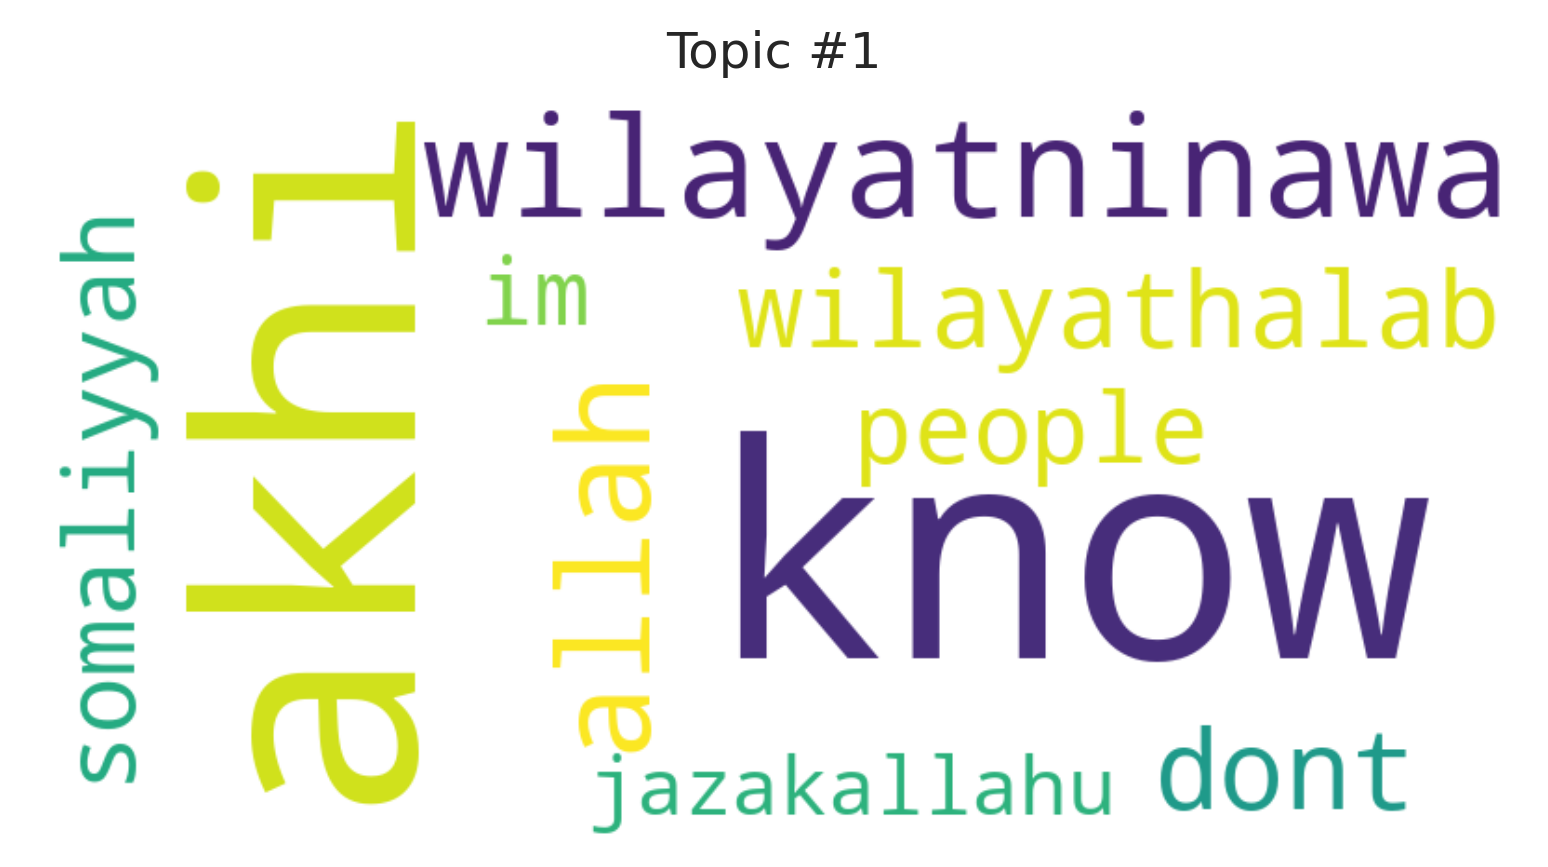

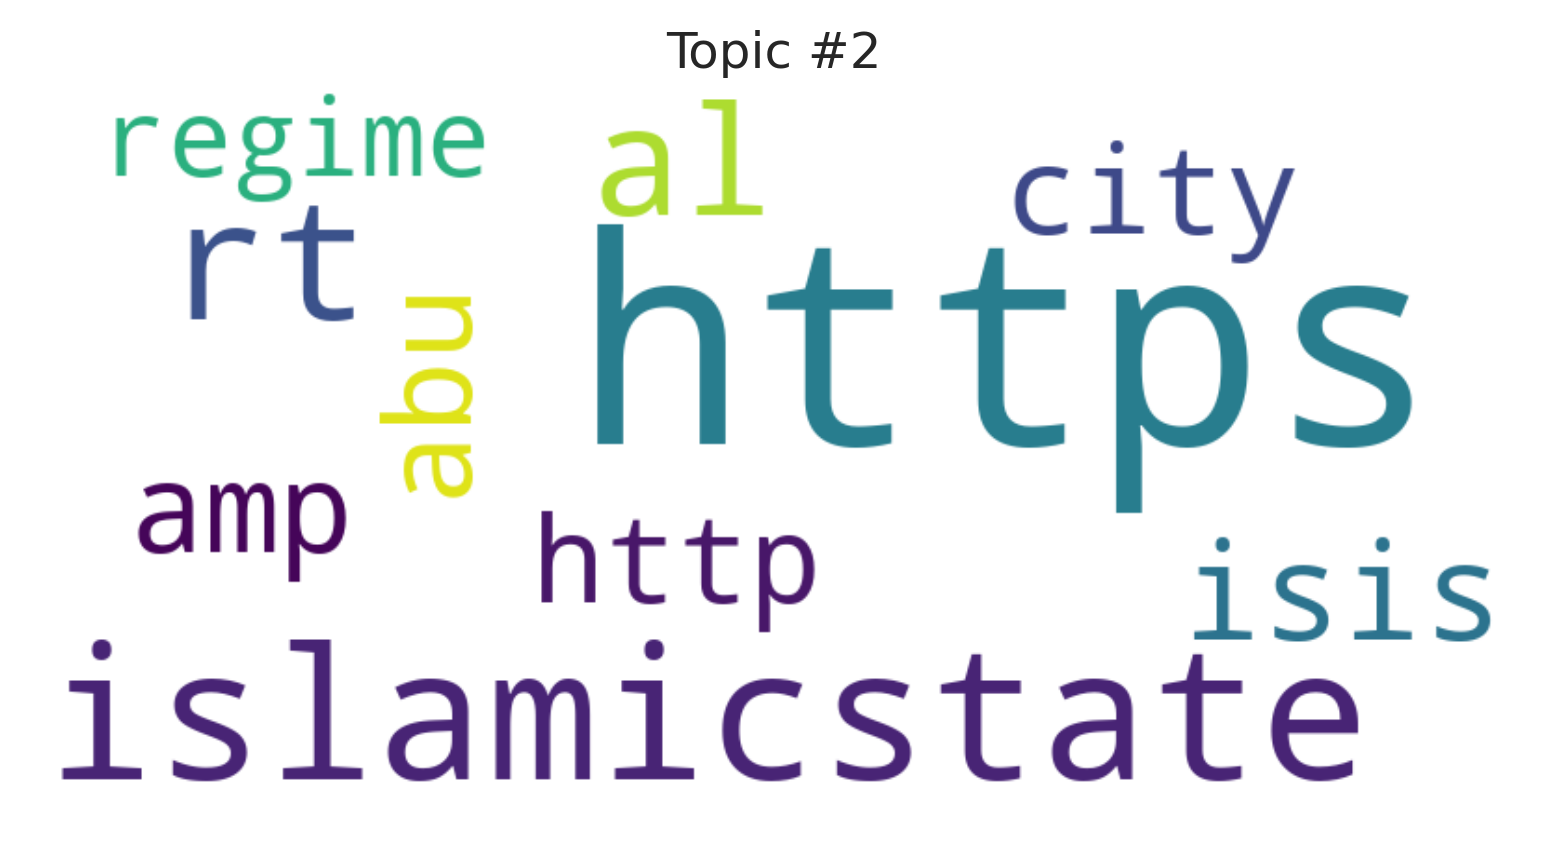

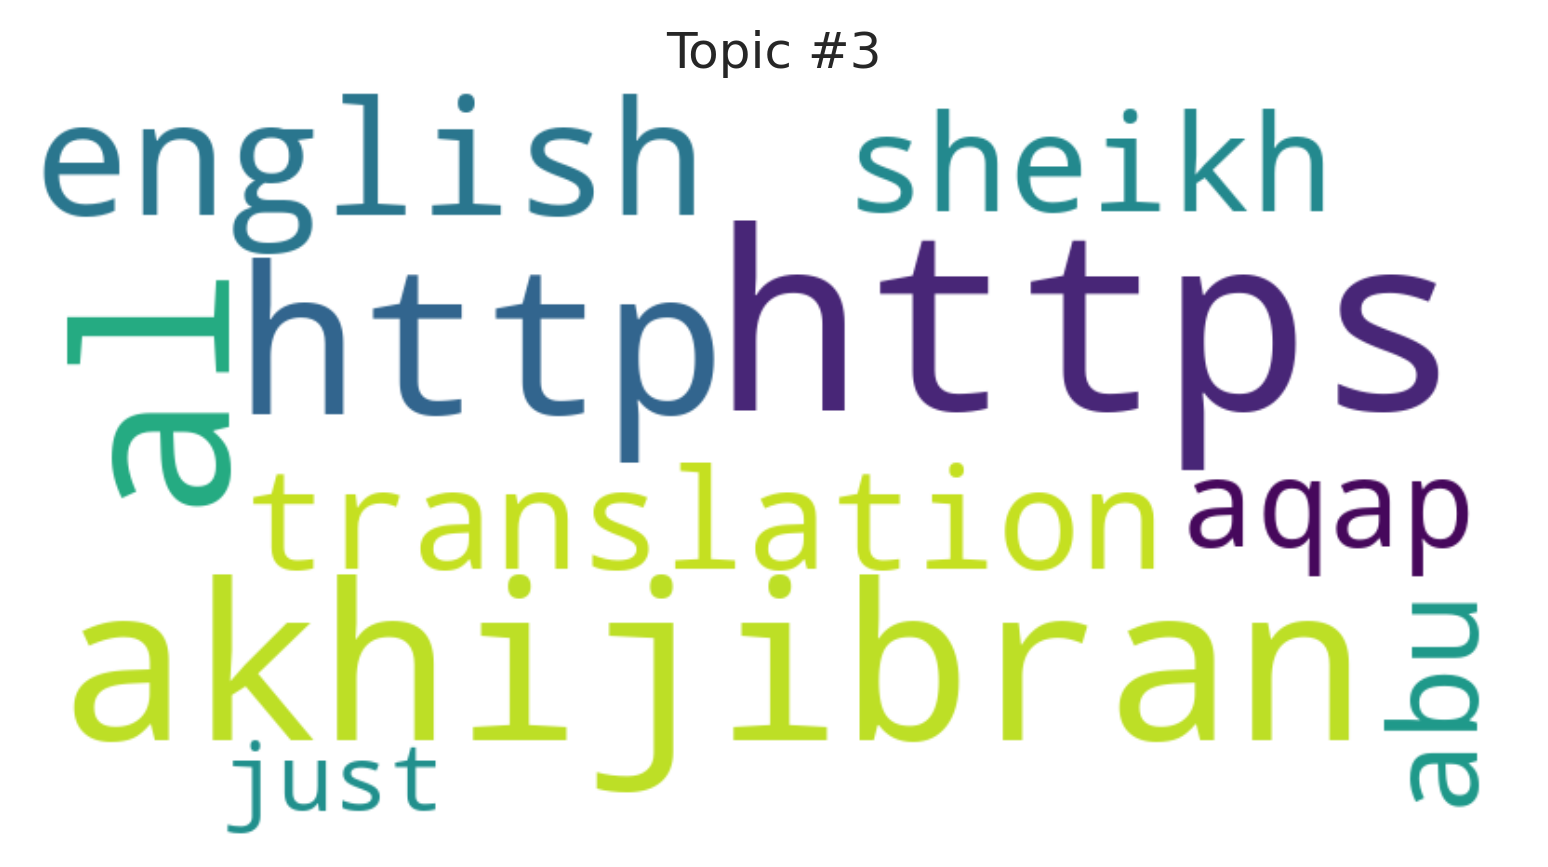

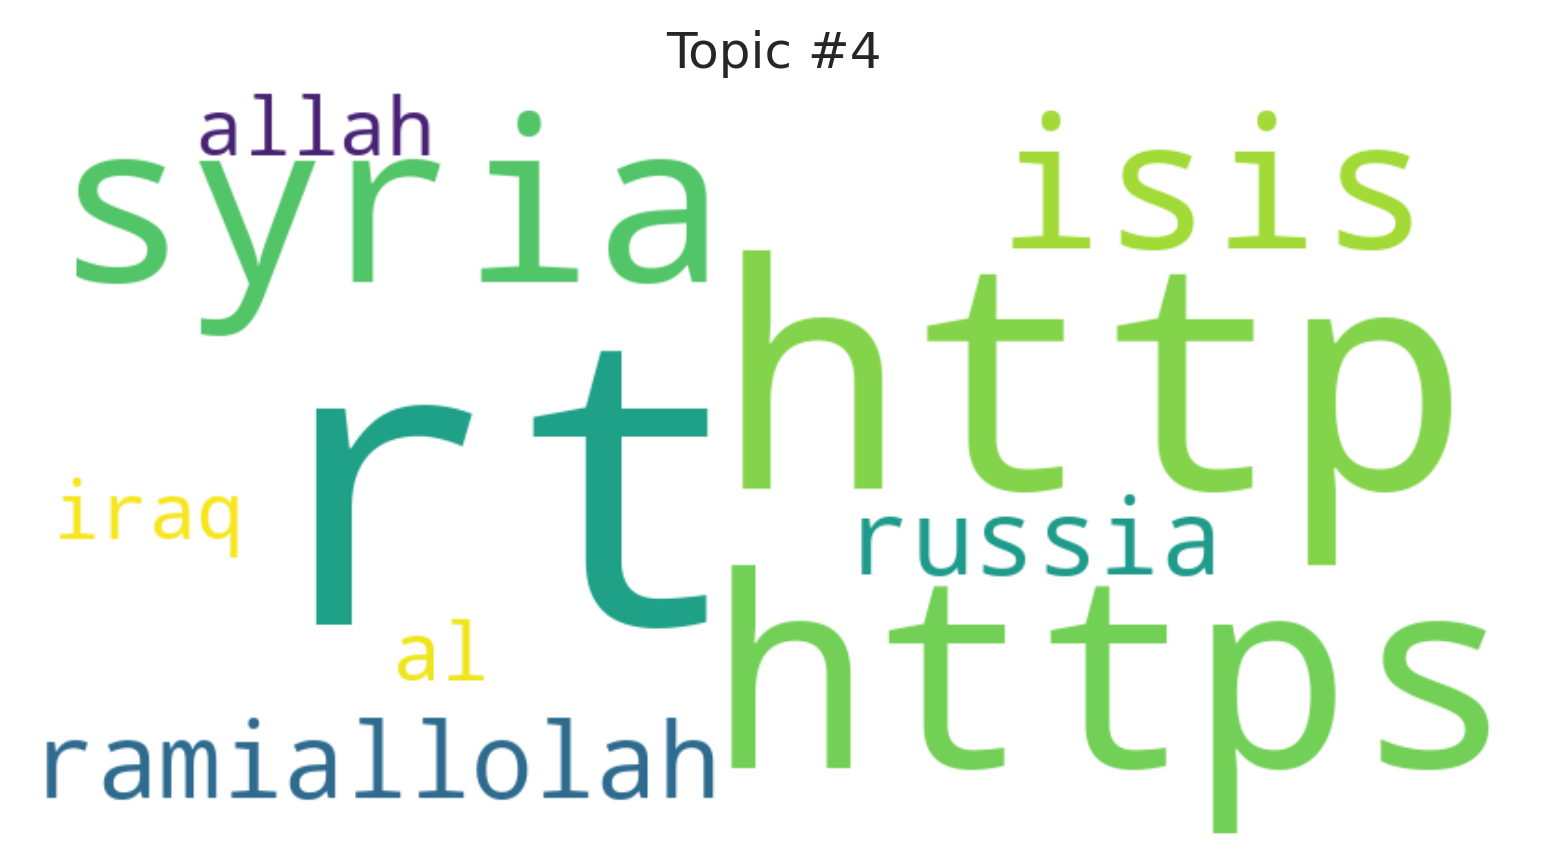

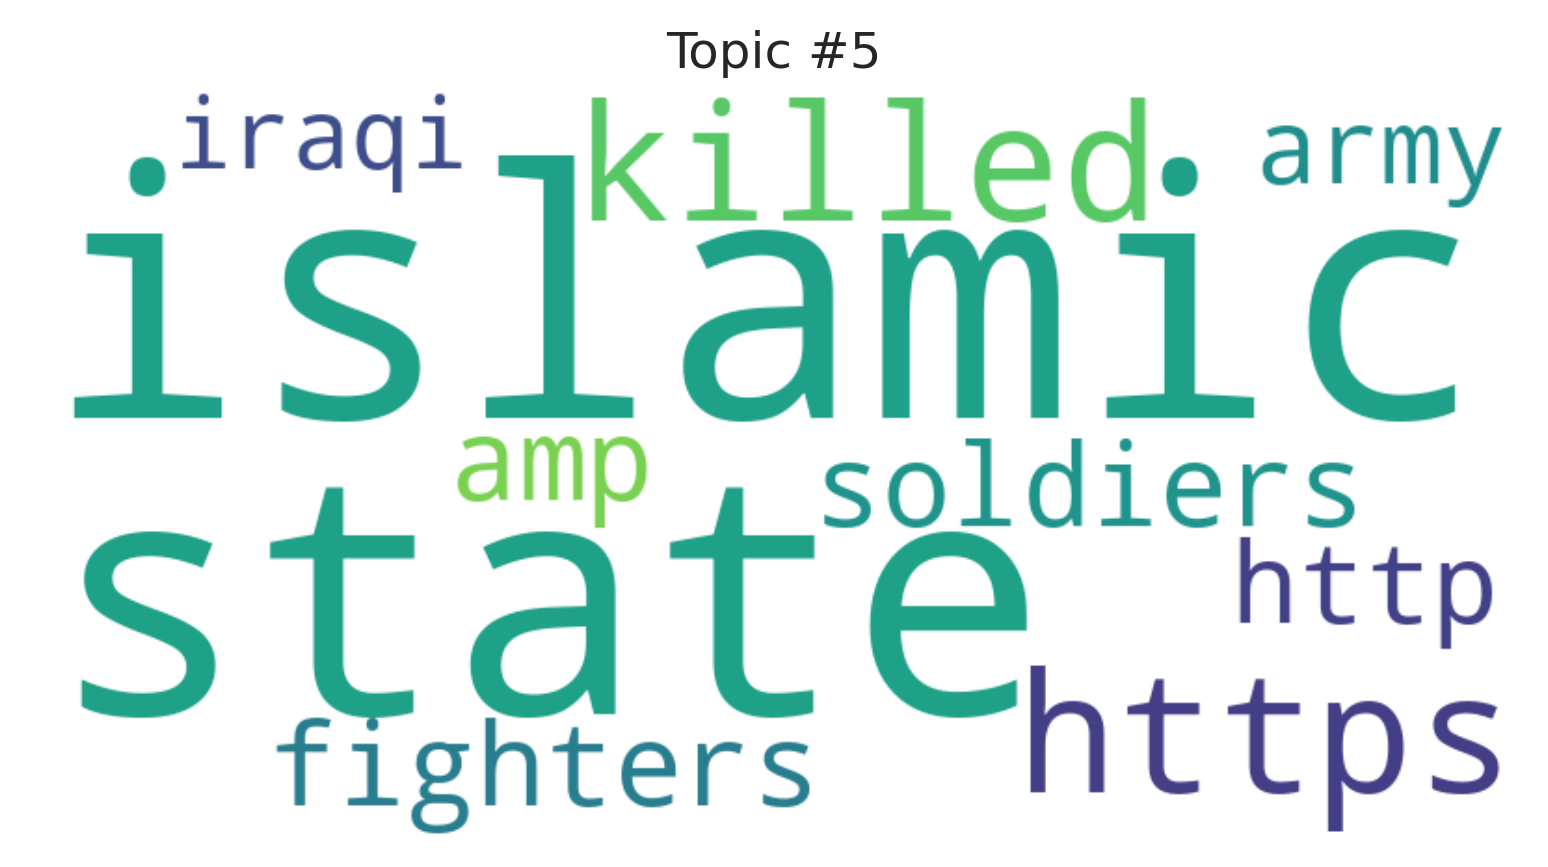

Word Clouds for 2016 Data:


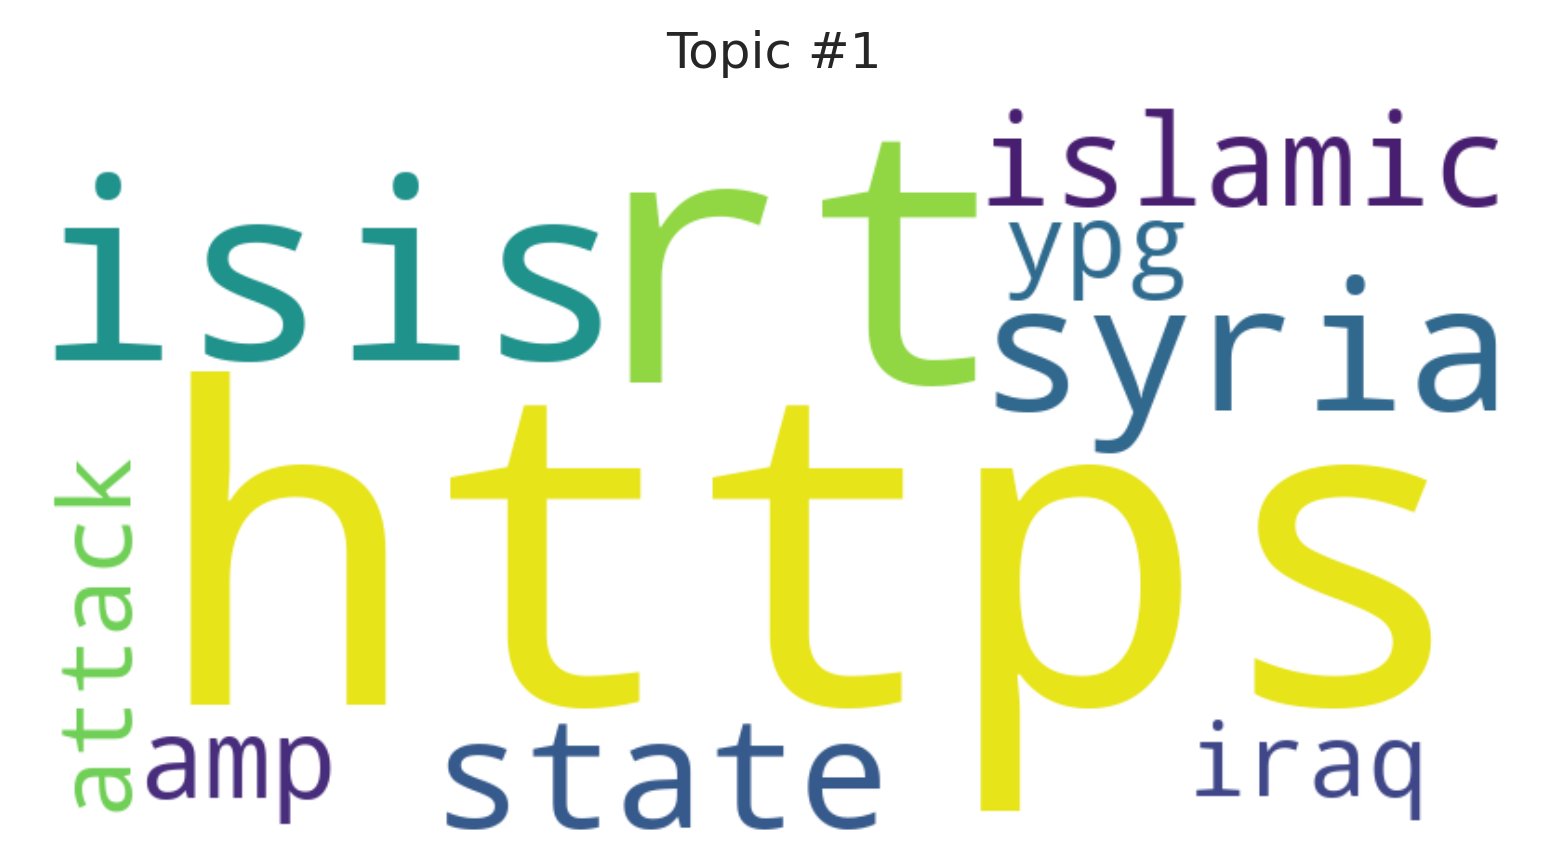

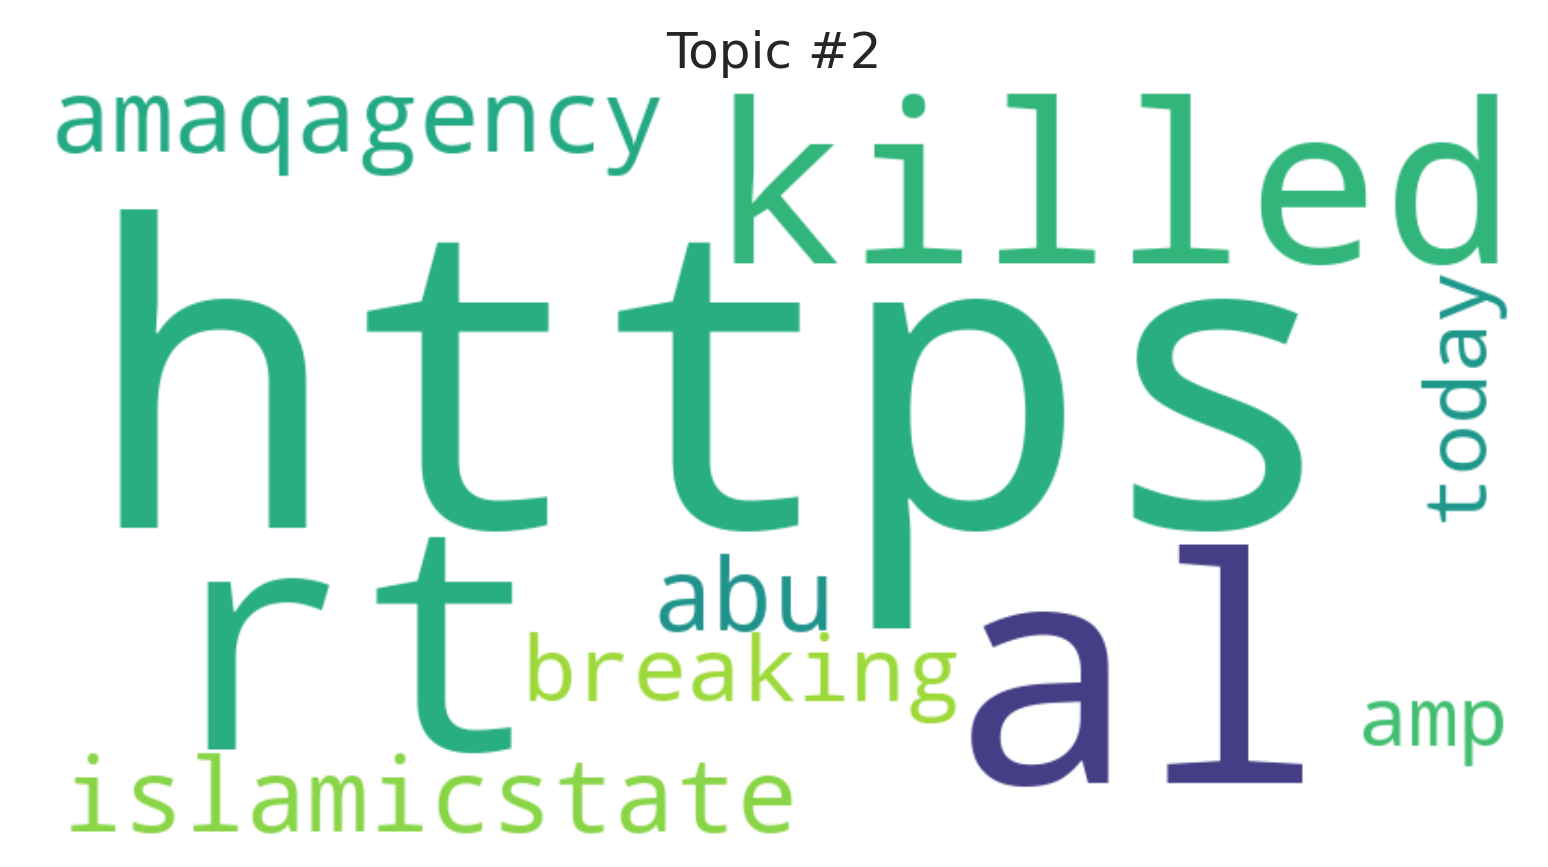

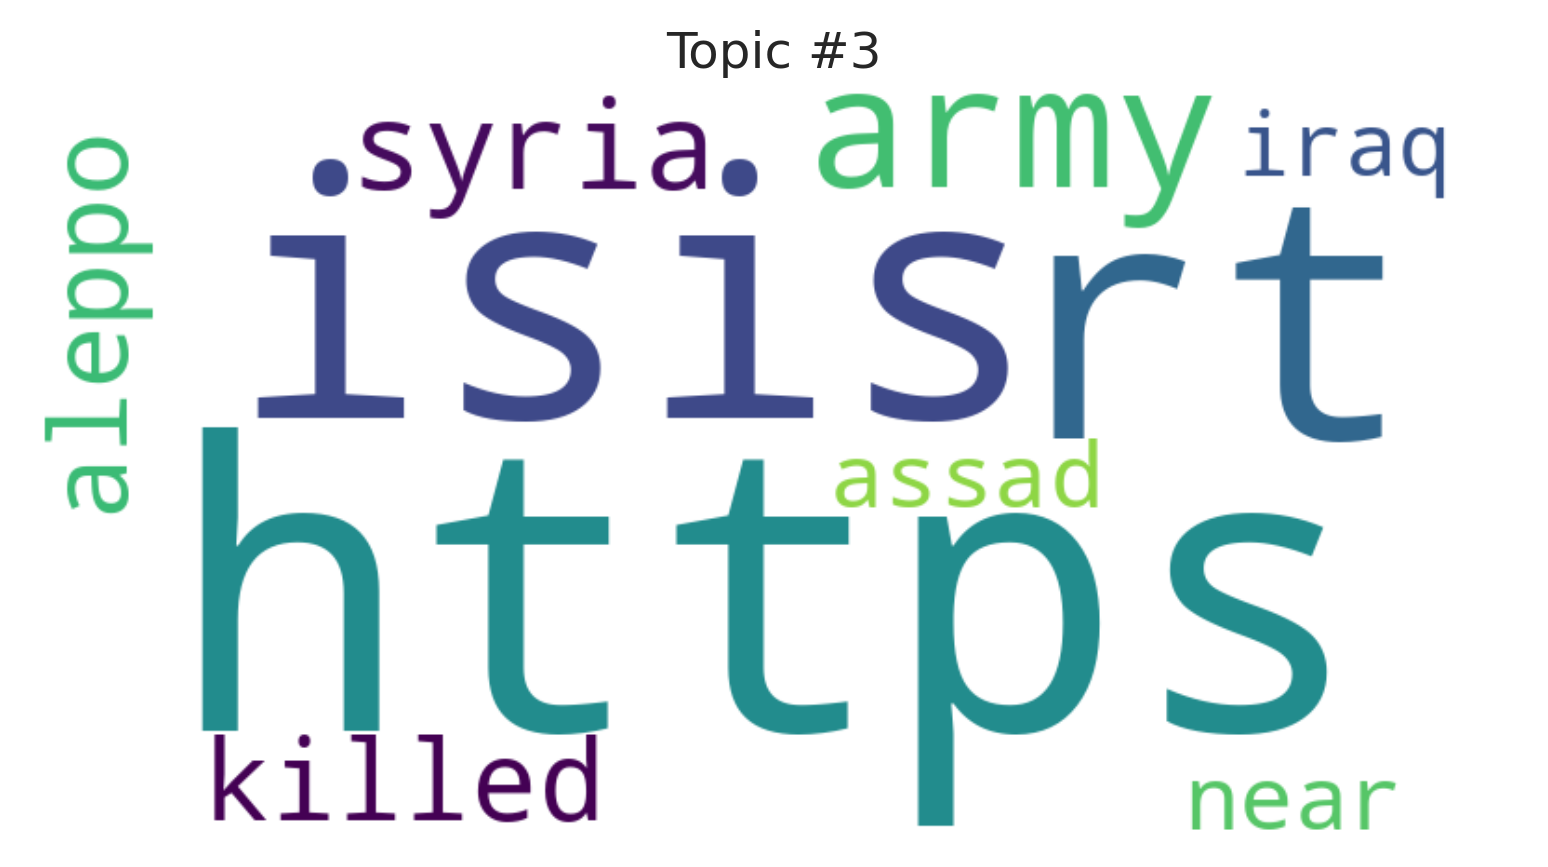

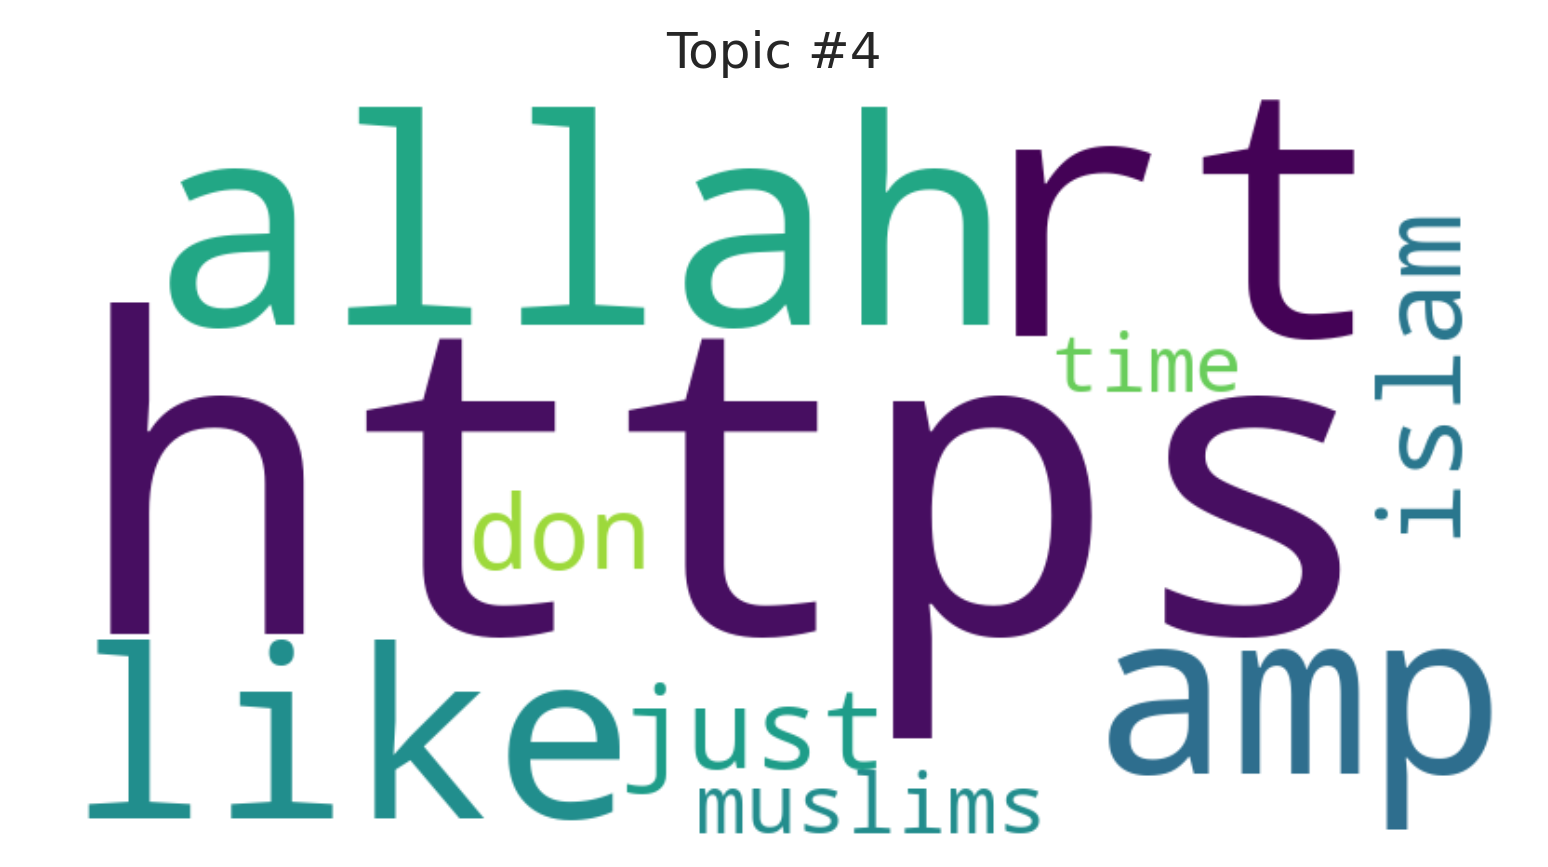

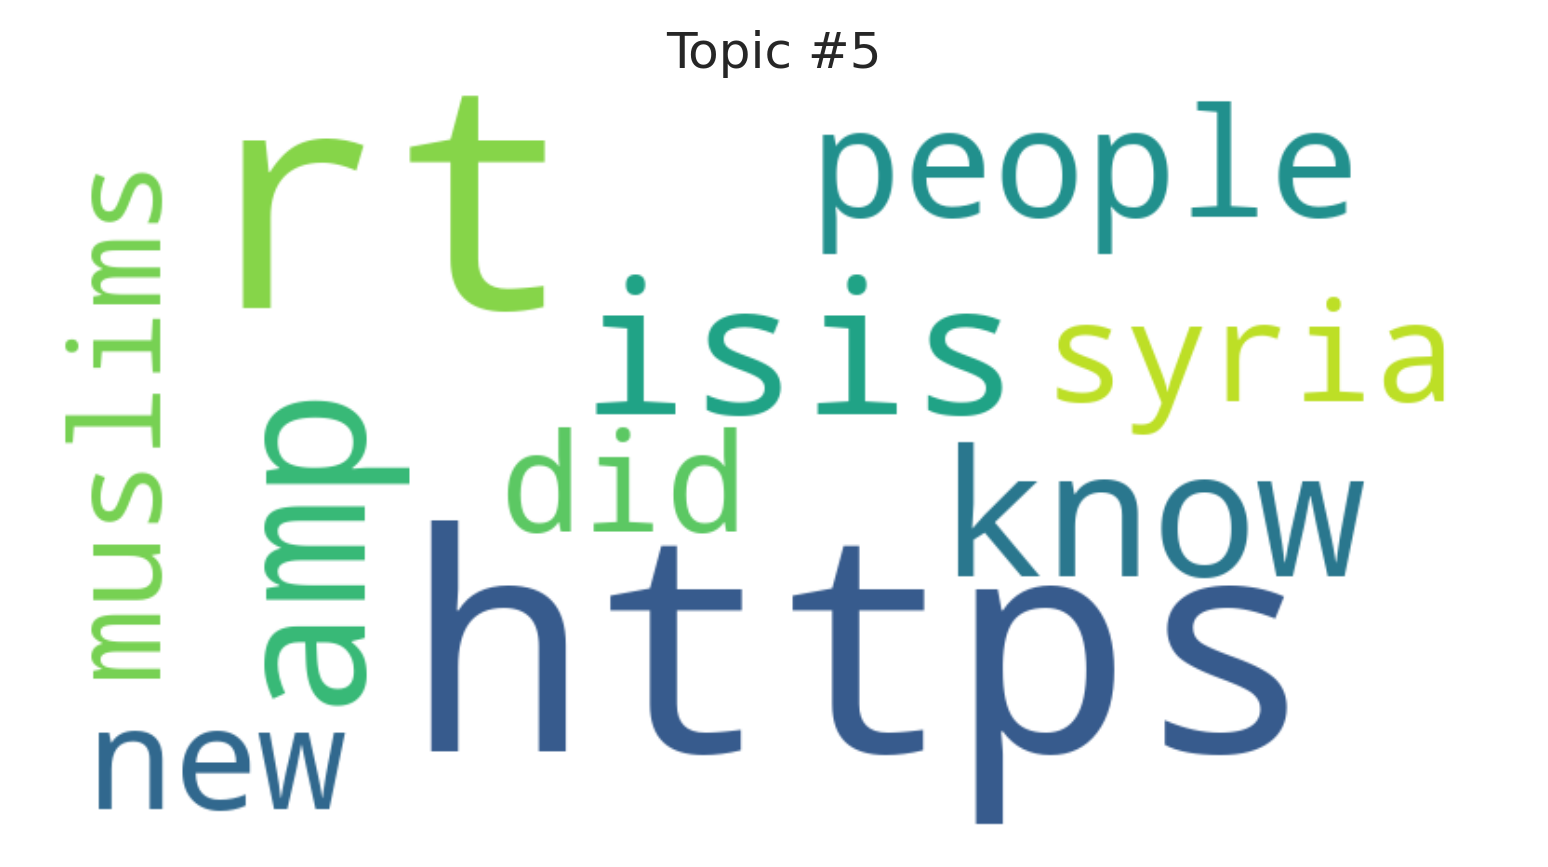

In [ ]:
# Visual Representation of Topics From LDA
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to create and display word clouds for each topic
def plot_word_clouds(topics, num_topics):
    for i, topic in enumerate(topics):
        # Create a dictionary with words and their weights
        word_freq = {word: weight for word, weight in topic}
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
        plt.figure()
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f'Topic #{i+1}')
        plt.show()

# Adjust the get_topics function to include weights
def get_topics_with_weights(lda_model, vectorizer):
    keywords = np.array(vectorizer.get_feature_names_out())
    topics = []
    for topic_weights in lda_model.components_:
        top_keywords_locs = (-topic_weights).argsort()[:10]
        topics.append([(keywords[i], topic_weights[i]) for i in top_keywords_locs])
    return topics

# Get topics with weights for word cloud generation
topics_2015_with_weights = get_topics_with_weights(lda_model_2015, vrizer2015)
topics_2016_with_weights = get_topics_with_weights(lda_model_2016, vrizer2016)

# Plot word clouds for 2015 data
print("Word Clouds for 2015 Data:")
plot_word_clouds(topics_2015_with_weights, num_topics)

# Plot word clouds for 2016 data
print("Word Clouds for 2016 Data:")
plot_word_clouds(topics_2016_with_weights, num_topics)
